## Preprocessing

### Librarys


In [1]:
import pandas as pd        # for data manipulation
import seaborn as sns      # for statistical data visualisation
import numpy as np         # for linear algebra
import matplotlib.pyplot as plt  # for data visualization
from scipy import stats        # for calculating statistics
from scipy.stats import zscore
from statsmodels.graphics.mosaicplot import mosaic

# Importing various machine learning algorithm from sklearn
import sklearn.preprocessing as spp
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.decomposition as sdc
import sklearn.cluster as sclus
import sklearn.metrics as smet
import sklearn.manifold as skm
from sklearn.manifold import Isomap
import sklearn.datasets as sdat
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error,roc_curve,auc,accuracy_score
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

### Import data & first exploration, cleaning

##### Data import

In [2]:
sample = pd.read_csv("./data/sample_solution.csv", delimiter=",")
train_df = pd.read_csv("./data/train.csv", delimiter=",")
test_df = pd.read_csv("./data/test.csv", delimiter=",")
print("The dataset for train is composed by {} rows and {} columns".format(train_df.shape[0],train_df.shape[1]))
print("The dataset for test is composed by {} rows and {} columns".format(test_df.shape[0],test_df.shape[1]))
train_df.head()

The dataset for train is composed by 75757 rows and 64 columns
The dataset for test is composed by 9705 rows and 63 columns


Year_Factor State_Factor building_class  \
0            1      State_1     Commercial   
1            1      State_1     Commercial   
2            1      State_1     Commercial   
3            1      State_1     Commercial   
4            1      State_1     Commercial   

                               facility_type  floor_area  year_built  \
0               Grocery_store_or_food_market     61242.0      1942.0   
1  Warehouse_Distribution_or_Shipping_center    274000.0      1955.0   
2                       Retail_Enclosed_mall    280025.0      1951.0   
3                  Education_Other_classroom     55325.0      1980.0   
4                  Warehouse_Nonrefrigerated     66000.0      1985.0   

   energy_star_rating  ELEVATION  january_min_temp  january_avg_temp  ...  \
0                11.0        2.4                36              50.5  ...   
1                45.0        1.8                36              50.5  ...   
2                97.0        1.8                36              50.5  ...   
3                46.0        1.8                36              50.5  ...   
4               100.0        2.4                36              50.5  ...   

   days_above_80F  days_above_90F  days_above_100F  days_above_110F  \
0              14               0                0                0   
1              14               0                0                0   
2              14               0                0                0   
3              14               0                0                0   
4              14               0                0                0   

   direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
0                       1.0                        1.0             1.0   
1                       1.0                        NaN             1.0   
2                       1.0                        NaN             1.0   
3                       1.0                        NaN             1.0   
4                       1.0                        1.0             1.0   

   days_with_fog    site_eui  id  
0            NaN  248.682615   0  
1           12.0   26.500150   1  
2           12.0   24.693619   2  
3           12.0   48.406926   3  
4            NaN    3.899395   4  

[5 rows x 64 columns]

##### Describe

In [3]:
train_df.describe()

Year_Factor    floor_area    year_built  energy_star_rating  \
count  75757.000000  7.575700e+04  73920.000000        49048.000000   
mean       4.367755  1.659839e+05   1952.306764           61.048605   
std        1.471441  2.468758e+05     37.053619           28.663683   
min        1.000000  9.430000e+02      0.000000            0.000000   
25%        3.000000  6.237900e+04   1927.000000           40.000000   
50%        5.000000  9.136700e+04   1951.000000           67.000000   
75%        6.000000  1.660000e+05   1977.000000           85.000000   
max        6.000000  6.385382e+06   2015.000000          100.000000   

          ELEVATION  january_min_temp  january_avg_temp  january_max_temp  \
count  75757.000000      75757.000000      75757.000000      75757.000000   
mean      39.506323         11.432343         34.310468         59.054952   
std       60.656596          9.381027          6.996108          5.355458   
min       -6.400000        -19.000000         10.806452         42.000000   
25%       11.900000          6.000000         29.827586         56.000000   
50%       25.000000         11.000000         34.451613         59.000000   
75%       42.700000         13.000000         37.322581         62.000000   
max     1924.500000         49.000000         64.758065         91.000000   

       february_min_temp  february_avg_temp  ...  days_above_80F  \
count       75757.000000       75757.000000  ...    75757.000000   
mean           11.720567          35.526837  ...       82.709809   
std            12.577272           8.866697  ...       25.282913   
min           -13.000000          13.250000  ...        0.000000   
25%             2.000000          31.625000  ...       72.000000   
50%             9.000000          34.107143  ...       84.000000   
75%            20.000000          40.879310  ...       97.000000   
max            48.000000          65.107143  ...      260.000000   

       days_above_90F  days_above_100F  days_above_110F  \
count    75757.000000     75757.000000     75757.000000   
mean        14.058701         0.279539         0.002442   
std         10.943996         2.252323         0.142140   
min          0.000000         0.000000         0.000000   
25%          6.000000         0.000000         0.000000   
50%         12.000000         0.000000         0.000000   
75%         17.000000         0.000000         0.000000   
max        185.000000       119.000000        16.000000   

       direction_max_wind_speed  direction_peak_wind_speed  max_wind_speed  \
count              34675.000000               33946.000000    34675.000000   
mean                  66.552675                  62.779974        4.190601   
std                  131.147834                 130.308106        6.458789   
min                    1.000000                   1.000000        1.000000   
25%                    1.000000                   1.000000        1.000000   
50%                    1.000000                   1.000000        1.000000   
75%                    1.000000                   1.000000        1.000000   
max                  360.000000                 360.000000       23.300000   

       days_with_fog      site_eui            id  
count   29961.000000  75757.000000  75757.000000  
mean      109.142051     82.584693  37878.000000  
std        50.699751     58.255403  21869.306509  
min        12.000000      1.001169      0.000000  
25%        88.000000     54.528601  18939.000000  
50%       104.000000     75.293716  37878.000000  
75%       131.000000     97.277534  56817.000000  
max       311.000000    997.866120  75756.000000  

[8 rows x 61 columns]

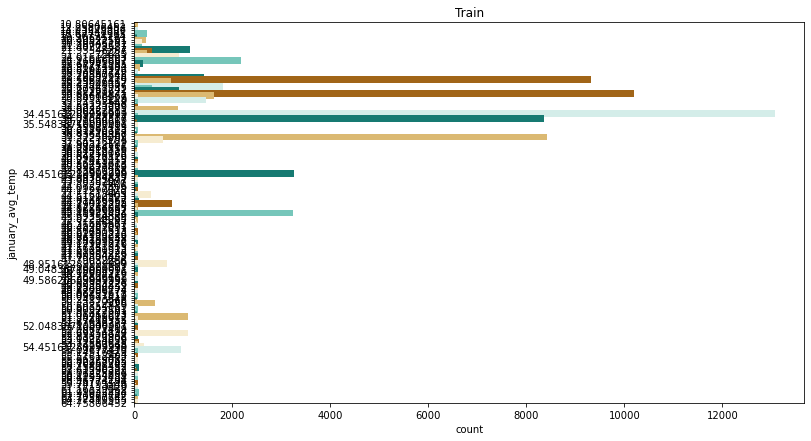

In [19]:
def count_plot(feature, num):
    plt.figure(figsize=(12,7))
    count = sns.countplot(y=feature, data=train_df, color='salmon', facecolor=(0,0,0,0), linewidth=5, edgecolor=sns.color_palette("BrBG", num))
    count.set_title('Train')
    plt.show()

# count_plot('Year_Factor', 6)
count_plot('january_avg_temp', 6)



##### Data type and correction of type

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

In [5]:
# train_df.columns

# train_df_temp = train_df['january_min_temp', 'january_avg_temp', 'january_max_temp', 'february_min_temp', 'february_avg_temp', 'february_max_temp'].copy()
# # # ,
# #        'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
# #        'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
# #        'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
# #        'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
# #        'august_avg_temp', 'august_max_temp', 'september_min_temp',
# #        'september_avg_temp', 'september_max_temp', 'october_min_temp',
# #        'october_avg_temp', 'october_max_temp', 'november_min_temp',
# #        'november_avg_temp', 'november_max_temp', 'december_min_temp',
#        'december_avg_temp', 'december_max_temp']


## ! Essaye de créer 3 bases de données : une contenant les variables des apparts, l'autre les variables climatiques et l'autre de temperature. 
## ! Essaye de comprendre comment traiter les variables de temperature et les visualiser correctement en tant que serie temporelle.


In [6]:
# train_df.columns
# train_df['january_min_temp'].unique()
# # train_df['january_min_temp'].value_counts()
# train_df['Year_Factor'].unique()
# train_df['State_Factor'].unique()
train_df['january_min_temp'].unique()
# train_df['january_min_temp']['Year_Factor']

array([ 36,  45,  43,  41,  34,  24,  31,  40,  22,  29,  19,  28,  15,
        23,  27,  21,  18,  17,  16,  39,  35,  20,  -2,  32,  26,  25,
        14,   3,  11,  13,  -7, -16,  30,  46,  47,  42,  49,  37,  33,
        38,  12,   8, -17, -19, -18,  -9, -10,  -8,  -4,  -6,   6,   5,
         0,   4,   7,   1,  -1,   2,  10], dtype=int64)

In [7]:
# df_n=df.replace({"CLASS":{"o":"Opel","s":"Saab","b":"Bus","v":"Van"}})
# grp=df_n.groupby("CLASS")['CLASS'].count()
# grp.plot.pie(shadow=True, startangle=120,autopct='%.2f')
# 

# df_n.describe().T
# df_n.head()

In [8]:
datasetrain_df['class'].value_counts()

NameError: name 'datasetrain_df' is not defined

In [ ]:
for i in train_df.columns:
    print(i+":"+train_df[i].isnull().sum())

TypeError: can only concatenate str (not "numpy.int64") to str

##### Cold Map


C:\Users\batiz\AppData\Local\Temp/ipykernel_16224/552649219.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(train_dfi.skew())


Year_Factor                  -0.527589
floor_area                    6.607210
year_built                  -11.864499
energy_star_rating           -0.528280
ELEVATION                     7.102841
                               ...    
direction_peak_wind_speed     1.643520
max_wind_speed                1.587614
days_with_fog                 1.198063
site_eui                      4.739972
id                            0.000000
Length: 61, dtype: float64
AxesSubplot(0.125,0.125;0.62x0.755)


C:\Users\batiz\AppData\Local\Temp/ipykernel_16224/552649219.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = Cor_Matrix.where(np.triu(np.ones(Cor_Matrix.shape),k=1).astype(np.bool))


These columns can be dropped as they are redundant: ['january_avg_temp', 'cooling_degree_days', 'direction_peak_wind_speed', 'max_wind_speed']
The Number of Rows in our dataset :75757 & Number of columns after remving multicollinearity:60


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56]),
 [Text(0, 0, 'Year_Factor'),
  Text(1, 0, 'floor_area'),
  Text(2, 0, 'year_built'),
  Text(3, 0, 'energy_star_rating'),
  Text(4, 0, 'ELEVATION'),
  Text(5, 0, 'january_min_temp'),
  Text(6, 0, 'january_max_temp'),
  Text(7, 0, 'february_min_temp'),
  Text(8, 0, 'february_avg_temp'),
  Text(9, 0, 'february_max_temp'),
  Text(10, 0, 'march_min_temp'),
  Text(11, 0, 'march_avg_temp'),
  Text(12, 0, 'march_max_temp'),
  Text(13, 0, 'april_min_temp'),
  Text(14, 0, 'april_avg_temp'),
  Text(15, 0, 'april_max_temp'),
  Text(16, 0, 'may_min_temp'),
  Text(17, 0, 'may_avg_temp'),
  Text(18, 0, 'may_max_temp'),
  Text(19, 0, 'june_min_temp'),
  Text(20, 0, 'june_avg_temp'),
  Text(21, 0, 'june_max_temp'),
  Text(22, 0, 'july_min_temp')

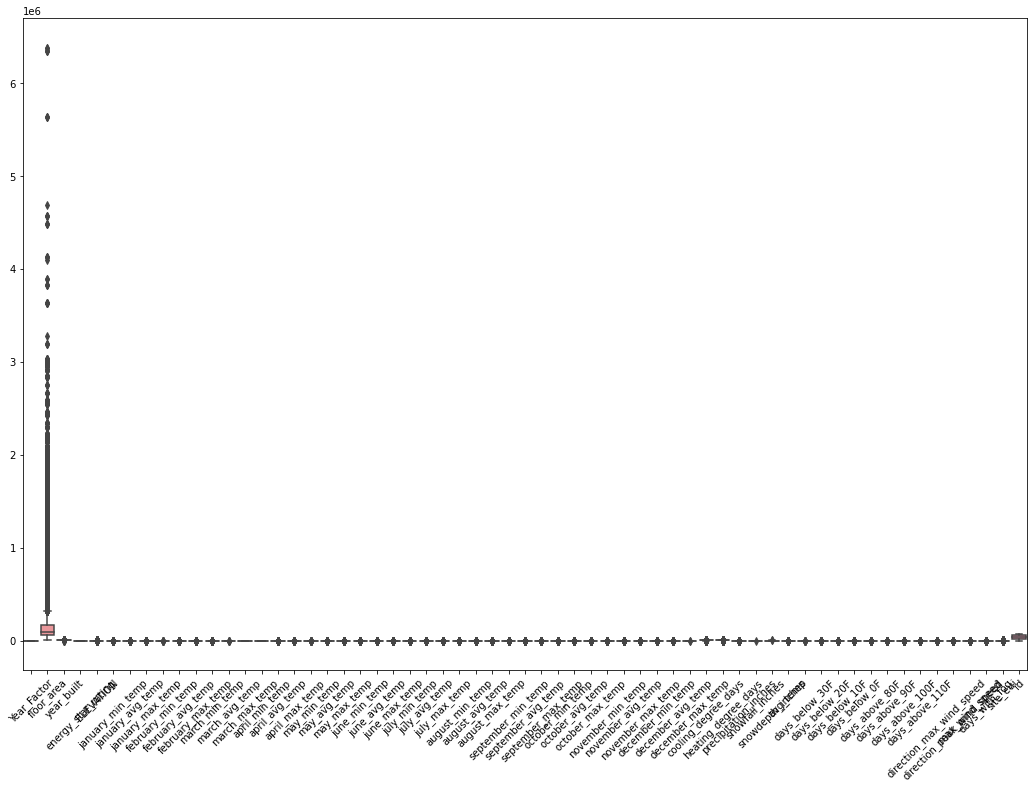

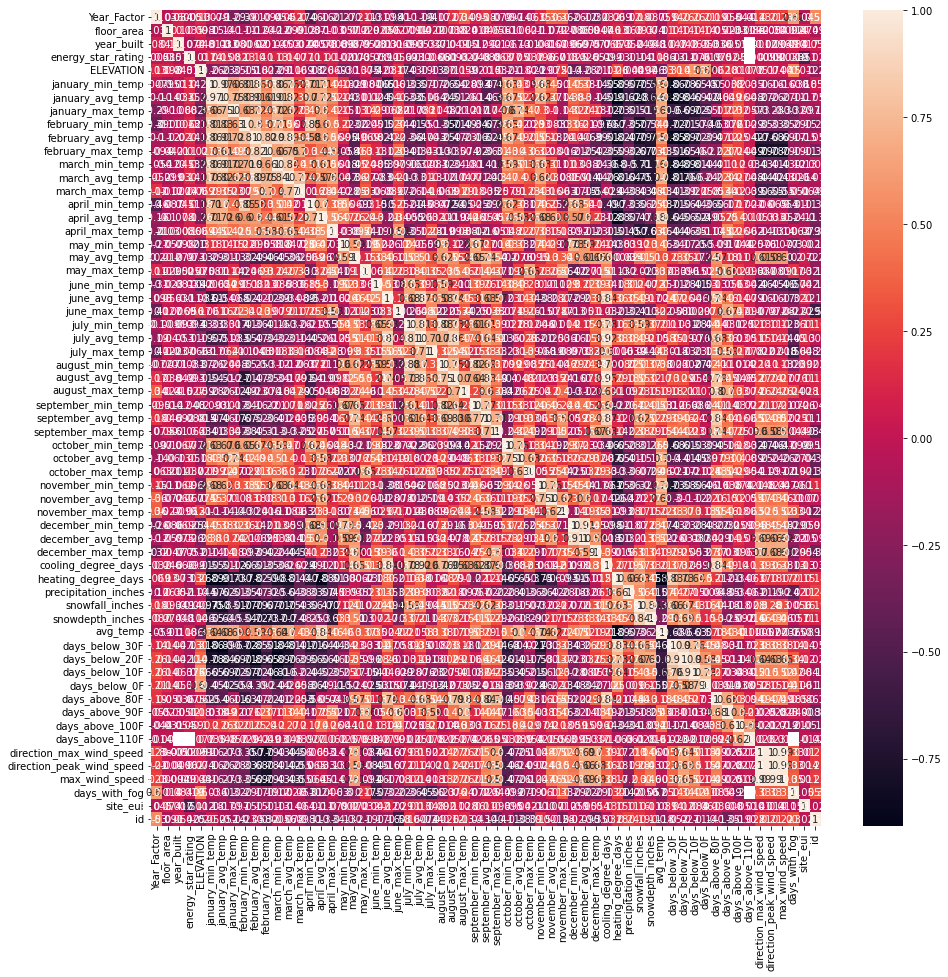

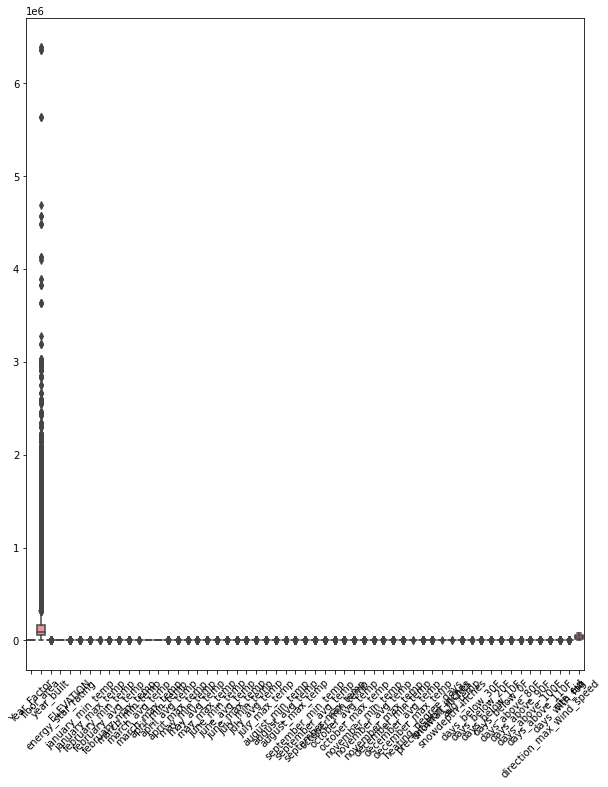

In [ ]:
train_dfi = train_df.copy()
plt.figure(figsize=(18,12))
sns.boxplot(data=train_dfi) 
plt.xticks(rotation=45)

print(train_dfi.skew())


plt.subplots(figsize=(15,15))
print(sns.heatmap(train_dfi.corr(),annot=True))

Cor_Matrix=train_dfi.corr().abs()
Cor_Matrix
upper_tri = Cor_Matrix.where(np.triu(np.ones(Cor_Matrix.shape),k=1).astype(np.bool))
to_drop =[column for column in upper_tri.columns if any(upper_tri[column] > 0.93)]
print("These columns can be dropped as they are redundant:",to_drop[0:6])
df1_n=train_dfi.drop(['january_avg_temp', 'cooling_degree_days', 'direction_peak_wind_speed', 'max_wind_speed'],axis=1)
print("The Number of Rows in our dataset :{} & Number of columns after remving multicollinearity:{}".format(df1_n.shape[0],df1_n.shape[1]))

plt.figure(figsize=(10,12))
sns.boxplot(data=df1_n)
plt.xticks(rotation=45)

### Categorical variables, dummys

In [ ]:
train_without_temp = train_df["Year_Factor", "State_Factor", "building_class", "facility_type", "floor_area", "year_built", "energy_star_rating", "ELEVATION", "january_min_temp", "cooling_degree_days", "heating_degree_days", "precipitation_inches", "snowfall_inches", "snowdepth_inches", "avg_temp", "days_below_30F", "days_below_20F", "days_below_10F", "days_below_0F", "days_above_80F", "days_above_90F", "days_above_100F", "days_above_110F", "direction_max_wind_speed", "direction_peak_wind_speed", "max_wind_speed", "days_with_fog", "site_eui", "id"].copy() 
# train_without_temp.head()

KeyError: ('Year_Factor', 'State_Factor', 'building_class', 'facility_type', 'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION', 'january_min_temp', 'cooling_degree_days', 'heating_degree_days', 'precipitation_inches', 'snowfall_inches', 'snowdepth_inches', 'avg_temp', 'days_below_30F', 'days_below_20F', 'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F', 'days_above_100F', 'days_above_110F', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog', 'site_eui', 'id')

In [ ]:
# df_opel=df_n[df_n["CLASS"]=='Opel']
# # df_saab=df_n[df_n['CLASS']=='Saab']
# df_bus=df_n[df_n['CLASS']=='Bus']
# df_van=df_n[df_n['CLASS']=='Van']

In [ ]:
# fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(25, 25))
# for i, column in enumerate(df1_n.columns):
#     sns.distplot(df_van[column],kde=True,color='B',hist=False,label="Van",ax=axes[i//3,i%3])
#     sns.distplot(df_opel[column],kde=True,color='r',hist=False,label="Opel",ax=axes[i//3,i%3])
#     sns.distplot(df_saab[column],kde=True,color='g',hist=False,label="Saab",ax=axes[i//3,i%3])
#     sns.distplot(df_bus[column],kde=True,color='y',hist=False,label="Bus",ax=axes[i//3,i%3])

### Outliers

COMPACTESNESS                       0.381271
CIRCULARITY                         0.262799
DISTANCE CIRCULARITY                0.107221
RADIUS RATIO                        0.390706
PR.AXIS ASPECT RATIO                3.821560
MAX.LENGTH ASPECT RATIO             6.778394
SCATTER RATIO                       0.605779
ELONGATEDNESS                       0.047845
PR.AXIS RECTANGULARITY              0.770684
MAX.LENGTH RECTANGULARITY           0.256359
SCALED VARIANCE ALONG MAJOR AXIS    0.651814
SCALED VARIANCE ALONG MINOR AXIS    0.835837
SCALED RADIUS OF GYRATION           0.280231
SKEWNESS ABOUT MAJOR AXIS           2.072583
SKEWNESS ABOUT MINOR AXIS           0.773792
KURTOSIS ABOUT MINOR AXIS           0.689325
KURTOSIS ABOUT MAJOR AXIS           0.248541
HOLLOWS RATIO                      -0.226341
dtype: float64
These columns can be dropped as they are redundant: ['ELONGATEDNESS', 'PR.AXIS RECTANGULARITY', 'MAX.LENGTH RECTANGULARITY', 'SCALED VARIANCE ALONG MAJOR AXIS', 'SCALED VARIAN

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

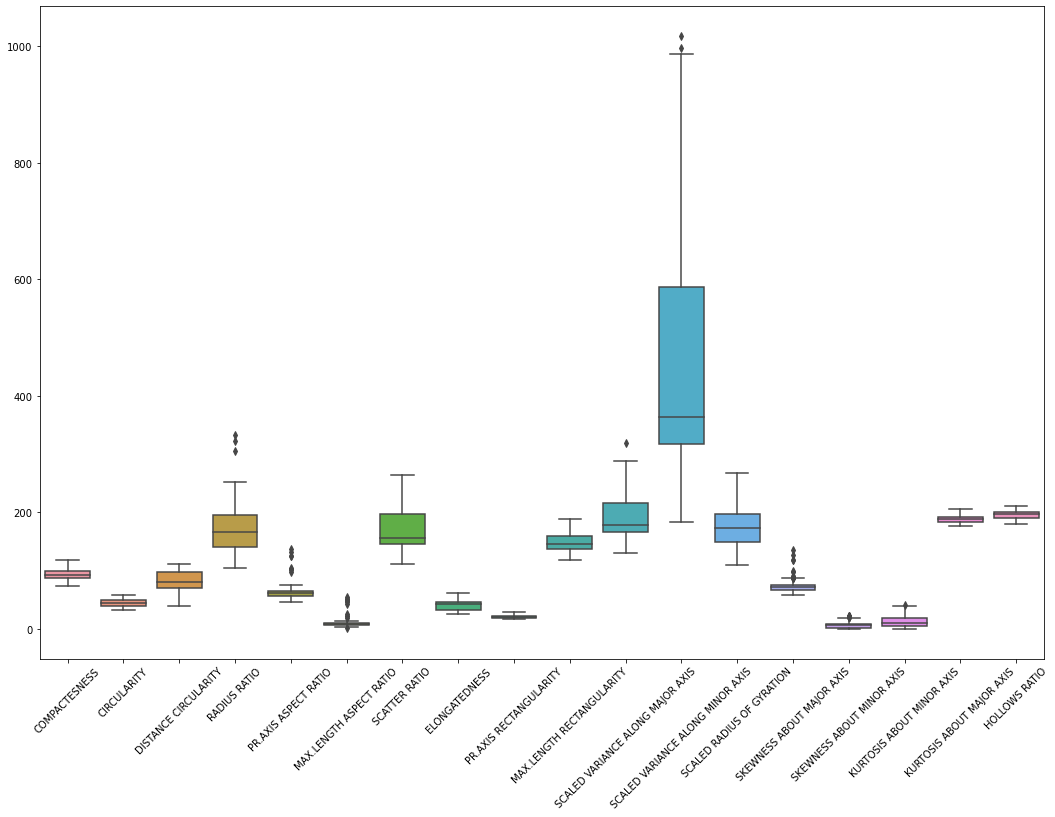

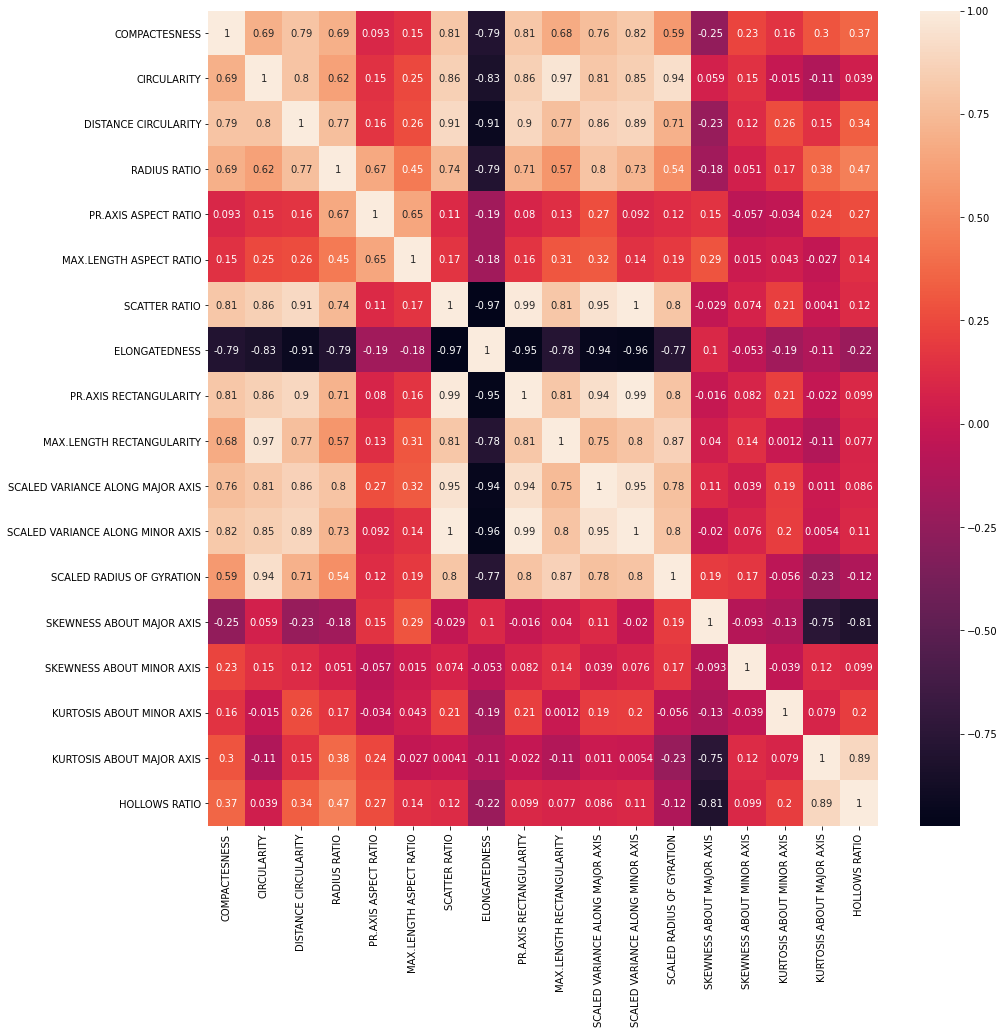

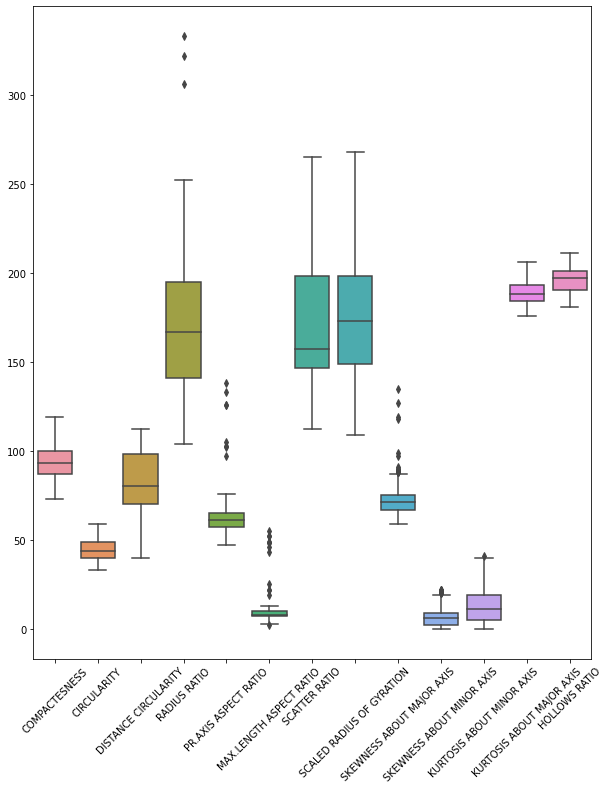

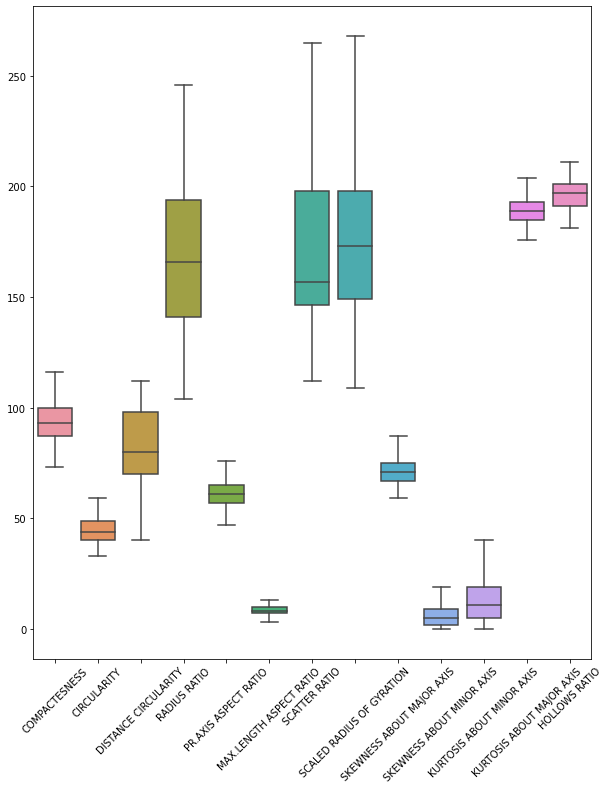

In [ ]:
df_n = df_n.copy()
plt.figure(figsize=(18,12))
sns.boxplot(data=df_n) 
plt.xticks(rotation=45)

print(df_n.skew())


plt.subplots(figsize=(15,15))
sns.heatmap(df_n.corr(),annot=True)

Cor_Matrix=df_n.corr().abs()
Cor_Matrix
upper_tri = Cor_Matrix.where(np.triu(np.ones(Cor_Matrix.shape),k=1).astype(np.bool))
to_drop =[column for column in upper_tri.columns if any(upper_tri[column] > 0.93)]
print("These columns can be dropped as they are redundant:",to_drop[0:6])
df1_n=df_n.drop(['ELONGATEDNESS', 'PR.AXIS RECTANGULARITY', 'MAX.LENGTH RECTANGULARITY', 'SCALED VARIANCE ALONG MAJOR AXIS', 'SCALED VARIANCE ALONG MINOR AXIS'],axis=1)
print("The Number of Rows in our dataset :{} & Number of columns after remving multicollinearity:{}".format(df1_n.shape[0],df1_n.shape[1]))

plt.figure(figsize=(10,12))
sns.boxplot(data=df1_n)
plt.xticks(rotation=45)


#IQR Calculation 
Q1=df1_n.quantile(0.25)
Q3=df1_n.quantile(0.75)
IQR= Q3 - Q1
IQR

df1_n = df1_n[~((df1_n < (Q1 - 1.5 * IQR)) |(df1_n > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(10,12))
sns.boxplot(data=df1_n) 
plt.xticks(rotation=45)

### Observe the distribution of each variable

#### Correlations between two variables

NameError: name 'df2_n' is not defined

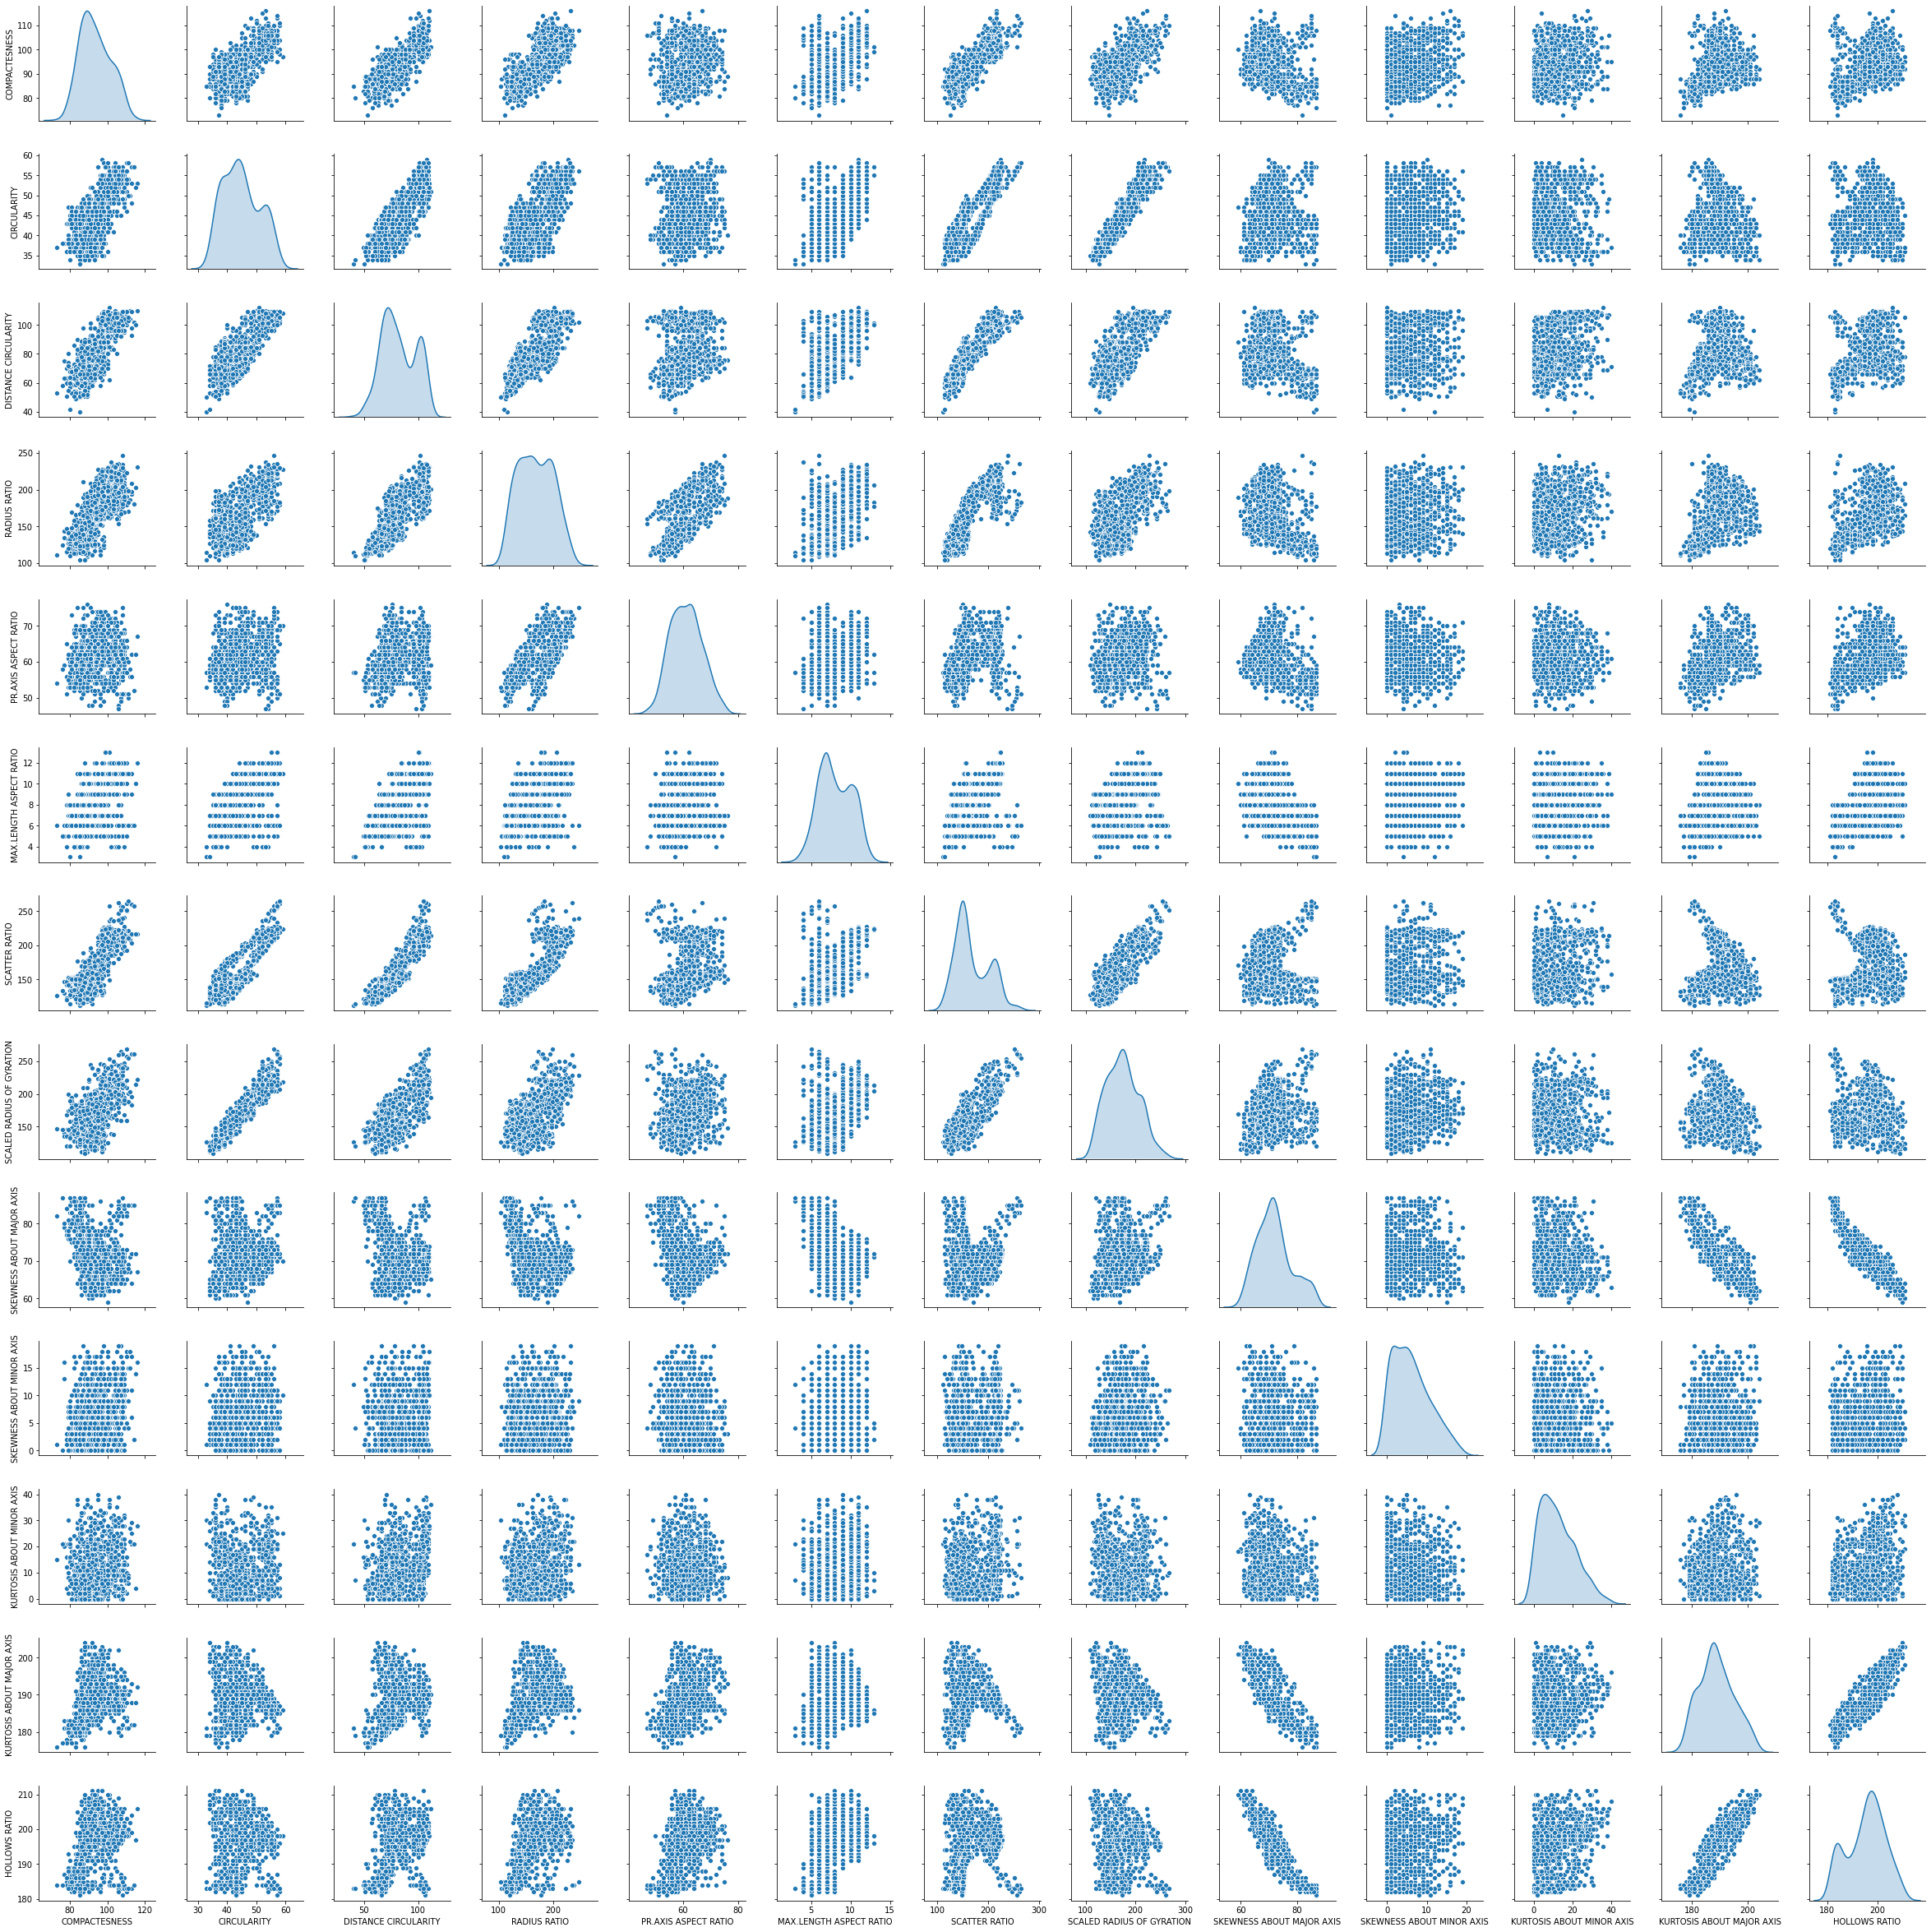

In [ ]:
# independant variables
X = df1_n
# the dependent variable
y = df_n["CLASS"]

sns.pairplot(X, diag_kind='kde')   # plot density curve instead of histogram on the diag

corr = df2_n.corr().round(2)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdBu')

plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)


#### PCA and Dimensionality Reduction


In [ ]:
df_pca=df2_n.values

data_norm=pd.DataFrame()
for i in df2_n.columns:
    if i!="CLASS":
        data_norm[i]=df2_n[i]-df2_n[i].min()
for i in data_norm.columns:
    if i!="CLASS":
        data_norm[i]=data_norm[i]/data_norm[i].max()
data_norm

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df_n = scaler.fit_transform(df_n.drop(columns = 'class'))

In [ ]:
x = df_n["CLASS"]
df_categ = df_n.apply(lambda x:len(x.unique))


#### Missing values

#### Nomalize and rescale a dataframe

#### Predictive Power and Overfitting

### Building a Predictive Model